<a href="https://colab.research.google.com/github/kgudalewski/grailed_sales_analysis/blob/main/Grailed_analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kgudalewski/grailed_sales_analysis/main/grailed_data_ML.csv",encoding="utf-16").drop(columns=["Unnamed: 0"])
df.head()

,size,condition,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price,color_black,...,designer_ChaseAuthentics,designer_RedBull,designer_Budweiser,designer_JeffHamilton,designer_Yamaha,designer_JhDesign,designer_HarleyDavidson,designer_Corvette,designer_LuckyBrand,designer_Ford
0,XS,Used,2.0,0.0,0.0,Europe,10.000000,28.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,XL,Used,9.0,0.0,1.0,Europe,21.430000,45.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Gently Used,5.0,0.0,0.0,US,23.614011,35.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,XL,Gently Used,16.0,10.0,1.0,Europe,23.614011,50.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,XL,Gently Used,7.0,0.0,1.0,US,21.430000,45.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(columns=["location","num_of_photos","num_of_tags","measurements"])

Target will be the price variable, i'll make all records fullfil with the price by adding shipping price to price (the shipping_price of this items was set on average shipping price earlier)

---



In [ ]:
df1 = df.loc[df.sold_price.isna()]
df1.sold_price = df1.price + df1.shipping_price
new_price = pd.DataFrame(df1.sold_price.values,index=list(df1.sold_price.index),columns=["sold_price"])
df.update(new_price)
df.price = df.sold_price
df = df.drop(columns=["shipping_price","sold_price"])

<ipython-input-33-b356bcb0aa9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sold_price = df1.price + df1.shipping_price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size                      15509 non-null  object 
 1   condition                 15509 non-null  object 
 2   price                     15509 non-null  float64
 3   color_black               15509 non-null  int64  
 4   color_red                 15509 non-null  int64  
 5   color_blue                15509 non-null  int64  
 6   color_white               15509 non-null  int64  
 7   color_multicolor          15509 non-null  int64  
 8   color_navy                15509 non-null  int64  
 9   color_brown               15509 non-null  int64  
 10  color_grey                15509 non-null  int64  
 11  color_green               15509 non-null  int64  
 12  color_yellow              15509 non-null  int64  
 13  color_orange              15509 non-null  int64  
 14  color_

In [ ]:
df_dummy = pd.get_dummies(df,drop_first=False).dropna()
df_dummy.head()

,price,color_black,color_red,color_blue,color_white,color_multicolor,color_navy,color_brown,color_grey,color_green,...,size_M,size_S,size_XL,size_XS,size_XXL,size_XXS,condition_Gently Used,condition_New,condition_Used,condition_Worn
0,38.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,66.430000,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,58.614011,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,73.614011,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,66.430000,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


<Axes: xlabel='price', ylabel='Count'>

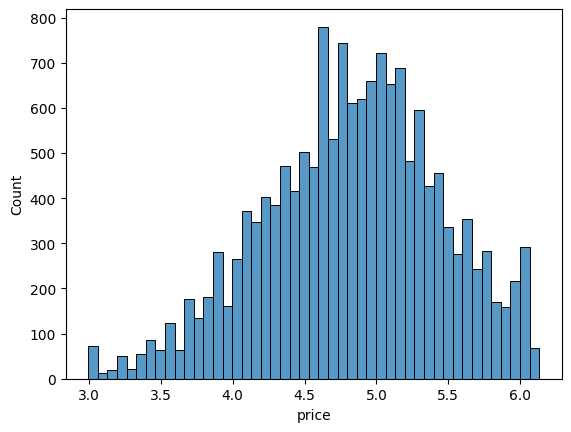

In [ ]:
sns.histplot(data = df_dummy,x=np.log(df_dummy.price))

In [ ]:
df_dummy.price = np.log(df_dummy.price)

In [ ]:
X = df_dummy.drop(columns=["price"])
y = df_dummy.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

<Axes: xlabel='price', ylabel='Count'>

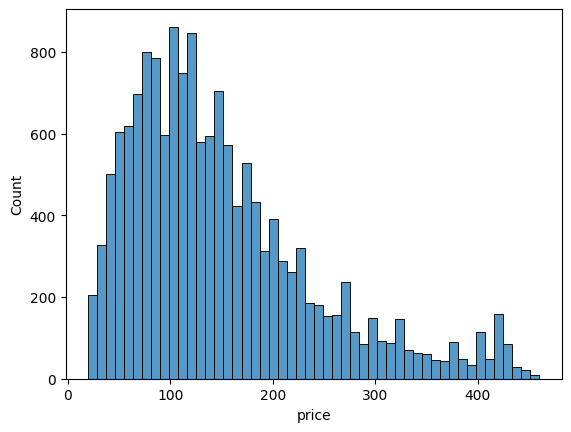

In [ ]:
sns.histplot(data = df,x="price")

In [ ]:
df = df.loc[df.price < 250]

In [ ]:
!pip install -qq lightgbm
import lightgbm as lgb

In [ ]:
model = lgb.LGBMRegressor(max_depth=10, n_estimators=550, random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print("MAPE : ",mean_absolute_percentage_error(y_test,predictions))
print("R2 : ",r2_score(y_test,predictions))
print("MAPE : ",mean_absolute_percentage_error(y_train,model.predict(X_train)))
print("R2 : ",r2_score(y_train,model.predict(X_train)))

MAPE :  0.09593678911033177
R2 :  0.16758638334493792
MAPE :  0.08704011774223457
R2 :  0.3137563578748801


In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes': [(128,32,32)],
    'max_iter': [300],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01],
    'learning_rate': ['constant'],
}

mlp_reg = MLPRegressor()

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 32, 32), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}


In [ ]:
grid_predictions = grid.predict(X_test) 

df_temp2 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(grid_predictions)})
df_temp2.head()

,Actual,Predicted
11115,210.000000,129.380859
2921,115.000000,135.172472
3463,123.614011,102.127855
2495,75.000000,152.853225
15263,40.000000,80.697022


In [ ]:
df_temp2.sample()

,Actual,Predicted
2357,423.614011,124.70478


In [ ]:
df_temp2
print("MAPE : ",mean_absolute_percentage_error(y_test,grid_predictions))
print("R2 : ",r2_score(y_test,grid_predictions))

MAPE :  0.09987783674346601
R2 :  0.07540171963710907


In [ ]:
model = DecisionTreeRegressor(max_depth=5,min_samples_split=3)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MAPE : ",mean_absolute_percentage_error(y_test,predictions))
print("R2 : ",r2_score(y_test,predictions))
print("MAPE : ",mean_absolute_percentage_error(y_train,model.predict(X_train)))
print("R2 : ",r2_score(y_train,model.predict(X_train)))

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor( loss="huber")

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print("MAPE : ",mean_absolute_percentage_error(y_test,predictions))
print("R2 : ",r2_score(y_test,predictions))
print("MAPE : ",mean_absolute_percentage_error(y_train,model.predict(X_train)))
print("R2 : ",r2_score(y_train,model.predict(X_train)))

MAPE :  0.5003898837148157
R2 :  -0.14046104446911256
MAPE :  0.5135159739588638
R2 :  -0.1492586604794317


<Axes: ylabel='Actual'>

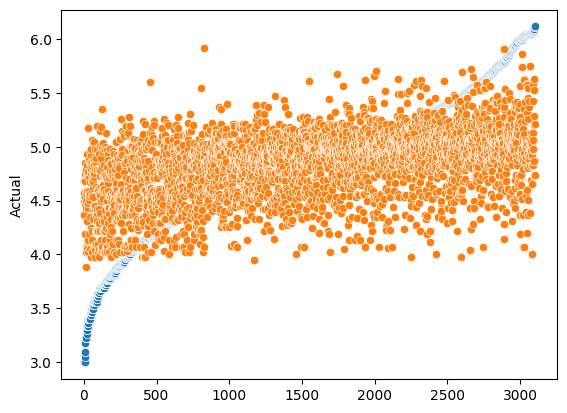

In [ ]:
predictions = model.predict(X_test)
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_temp2 = df_temp2.sort_values(by="Actual").reset_index(drop=True)
sns.scatterplot(x = df_temp2.index, y = df_temp2.Actual)
sns.scatterplot(x= df_temp2.index, y = df_temp2.Predicted)

<Axes: xlabel='price', ylabel='Count'>

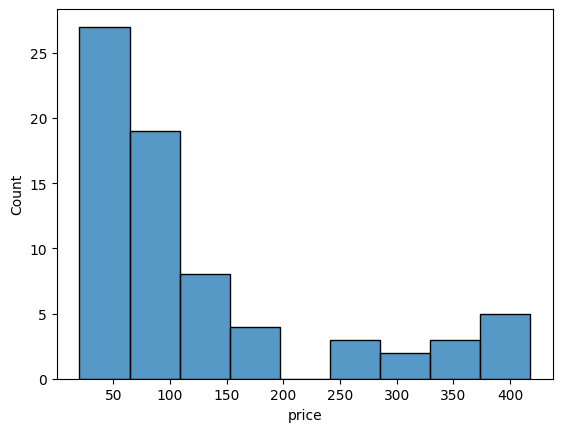

In [ ]:
sns.histplot(df_dummy.loc[df_dummy["size_L"] == 1].loc[df_dummy["color_black"] == 1].loc[df_dummy["condition_Gently Used"] == 1].loc[df_dummy["designer_Marlboro"] == 1].loc[df_dummy["vintage"] == 1].price)